In [1]:
# Importing the necessary libraries

import os
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tensorflow.keras.models import load_model
from tensorflow_addons.layers import InstanceNormalization

2021-09-26 08:31:08.898205: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
# Declaring the constants

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

AUTOTUNE = tf.data.experimental.AUTOTUNE

# declaring batches to train on a number of specified images simultaneously
BATCH_SIZE = 1

# image dimensions
IMG_WIDTH = 512
IMG_HEIGHT = 512
CHANNELS = 3

2021-09-26 08:31:14.727101: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-09-26 08:31:14.761550: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-26 08:31:14.763143: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:2d:00.0 name: GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2021-09-26 08:31:14.763174: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-09-26 08:31:14.781529: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-09-26 08:31:14.781583: I tensorflow/stream_executor/platform/

In [3]:
data_dir = '../DATA/Testing_Images/'
test_image = tf.data.Dataset.list_files(data_dir + '*', shuffle=True)

def parse_image(filename):

  image = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [512, 512])
  return image

test_image = test_image.map(parse_image)

2021-09-26 08:31:16.448251: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-26 08:31:16.449370: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-26 08:31:16.450579: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:2d:00.0 name: GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2021-09-26 08:31:16.450661: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but t

In [4]:
# to normalize the image to [-1, 1]
def normalize(image):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1
    return image

# method to preprocess the test images
# didn't transform to random images as we just want to test on it 
def preprocess_test_image(image):
    image = normalize(image)
    return image

In [5]:
test_image = test_image.map(preprocess_test_image).batch(BATCH_SIZE).prefetch(AUTOTUNE)

In [6]:
model = load_model('../models/generator_g.h5', custom_objects={'InstanceNormalization': InstanceNormalization})

In [7]:
model.compile()

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
instance_normalization (Instanc (None, 512, 512, 64) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 512, 512, 64) 0           instance_normalization[0][0]     
______________________________________________________________________________________________

In [9]:
# A method to generate a sample image on which we can see the training efficiency visually

def generate_images(model, image):
    predicted = model(image)

    plt.figure(figsize=(12,12))
    display_list = [image[0], predicted[0]]
    title = ['Test Image', 'Predicted Image']

    for i in range(len(display_list)):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')

    plt.show()

2021-09-26 08:31:39.689721: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-26 08:31:39.708382: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3800000000 Hz
2021-09-26 08:31:39.798051: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-09-26 08:31:40.617355: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2021-09-26 08:31:42.025100: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-09-26 08:31:42.886426: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


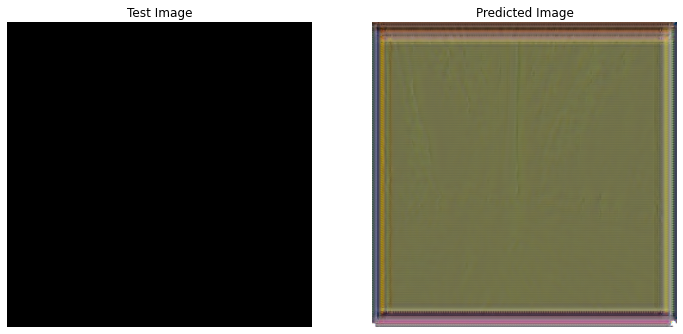

In [10]:
sample_photo = next(iter(test_image))
generate_images(model, sample_photo)